In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
# Load the training and testing data from CSV files
train = pd.read_csv("mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32691,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32692,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32693,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32694,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values
x_train.shape

(32696, 784)

In [8]:
# Determine the correct shape for x_train based on the number of rows
num_samples = x_train.shape[0]
x_train = x_train.reshape((num_samples, 28, 28, 1)).astype('float32') / 255



In [9]:
test = pd.read_csv(r"/content/mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609,482 (2.32 MB)

 Trainable params: 609,418 (2.32 MB)

 Non-trainable params: 64 (256.00 B)

In [11]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 65s 157ms/step - accuracy: 0.7486 - loss: 0.8462 - val_accuracy: 0.9520 - val_loss: 0.1936
Epoch 2/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 67s 165ms/step - accuracy: 0.9590 - loss: 0.1349 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 3/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 78s 155ms/step - accuracy: 0.9709 - loss: 0.0929 - val_accuracy: 0.9804 - val_loss: 0.0667
Epoch 4/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9767 - loss: 0.0701 - val_accuracy: 0.9798 - val_loss: 0.0715
Epoch 5/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9790 - loss: 0.0619 - val_accuracy: 0.9803 - val_loss: 0.0681
Epoch 6/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 63s 155ms/step - accuracy: 0.9850 - loss: 0.0474 - val_accuracy: 0.9807 - val_loss: 0.0716
Epoch 7/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9865 - loss: 0.0399 - val_accuracy: 0.9846 - val_loss: 0.0615
Epoch 8/11
409/409 ━━━━━━━━━━━━━━━━━━━━ 82s 155ms/step - accuracy: 0.9873 - loss: 0

In [12]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values
x_test.shape

(10000, 784)

In [13]:
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32')/255

In [14]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [15]:
predictions

array([[9.1751812e-13, 1.2473838e-11, 6.8371858e-12, ..., 9.9999994e-01,
        4.5261425e-12, 1.8369740e-08],
       [2.1253115e-07, 2.3825092e-07, 9.9999946e-01, ..., 2.6016775e-09,
        3.0167570e-08, 3.4741761e-14],
       [2.6260535e-10, 9.9999684e-01, 9.4135821e-08, ..., 5.3241018e-07,
        1.8174077e-07, 1.2475330e-10],
       ...,
       [2.1859644e-18, 2.8640740e-13, 1.2215748e-13, ..., 4.1133095e-12,
        4.8085474e-10, 1.1561163e-09],
       [1.2995301e-19, 2.9523142e-20, 3.5913768e-19, ..., 5.5242701e-17,
        3.3446107e-10, 5.1437972e-13],
       [3.4860634e-12, 1.1110301e-11, 3.8450132e-11, ..., 6.5062262e-17,
        4.4644892e-11, 1.2914818e-12]], dtype=float32)

In [16]:
r.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9804 - loss: 0.0695
Test Loss: 0.0535
Test Accuracy: 0.9854


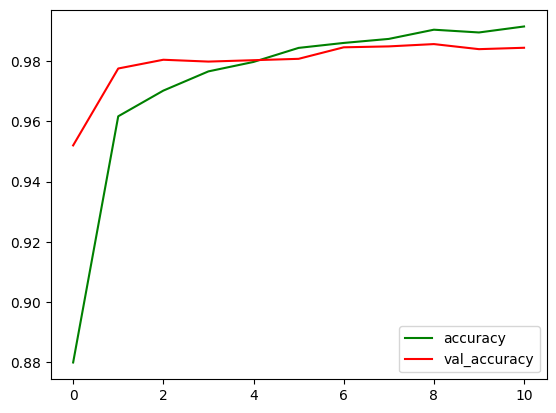

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

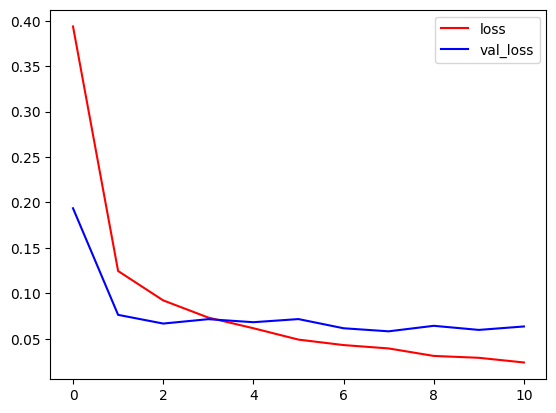

In [19]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()